# 2.3 Fundamentals of Visualization Libraries (Part 1)

## This script contains the following:
#### [1. Import Libraries](#import-libraries)
#### [2. Import Data](#import-data)
#### [3. Data Wrangling](#data-wrangling)
#### [4. Time Series - Average NYC Temperatures in 2022](#time-series)
#### [5. Bike Trips per Day](#bike-per-day)
#### [6. Dual Axis Line Chart - Daily Bike Trips + Average Temperatures](#dual-axis)
#### [7. Histogram - Bike Trip Duration](#histogram)
#### [8. Double Chart - Number of Rides by Ride Type and by Member Status](#double-chart)

### 1. Import Libraries<a class="anchor" id="import-libraries"></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime as dt
import os

### 2. Import Data<a class="anchor" id="import-data"></a>

In [6]:
folderpath = r'/Users/matthewjones/Documents/CareerFoundry/Data Visualization with Python/Achievement 2/NY-CitiBike/2. Data/Processed Data'

df = pd.read_csv(os.path.join(folderpath, 'nyc_bike_weather_data.csv'), low_memory=False, encoding="utf-8", index_col = 0)

### 3. Data Wrangling<a class="anchor" id="data-wrangling"></a>

In [8]:
# Check the columns of the imported data
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Unnamed: 0', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [9]:
# Drop the 'Unnamed' column and the merge flag
df.drop(columns = {'Unnamed: 0', '_merge'}, inplace = True)

In [10]:
# Check the output
df.head()

ride_id  rideable_type               started_at  \
0  9D0DC440CB40CF8E  electric_bike  2022-08-27 13:56:47.728   
1  2214991DFBE5C4D7  electric_bike  2022-08-20 10:37:02.756   
2  20C5D469563B6337   classic_bike  2022-08-31 18:55:03.051   
3  3E8791885BC189D1   classic_bike  2022-08-02 08:05:00.250   
4  8DBCBF98885106CB  electric_bike  2022-08-25 15:44:48.386   

                  ended_at        start_station_name start_station_id  \
0  2022-08-27 14:02:56.651  Flatbush Ave & Ocean Ave          3704.04   
1  2022-08-20 10:45:56.631    Forsyth St\t& Grand St          5382.07   
2  2022-08-31 19:03:37.344    Perry St & Bleecker St          5922.07   
3  2022-08-02 08:16:52.063       FDR Drive & E 35 St          6230.04   
4  2022-08-25 15:55:39.691           E 40 St & 5 Ave          6474.11   

                    end_station_name end_station_id  start_lat  start_lng  \
0          3 St & Prospect Park West        3865.05  40.663657 -73.963014   
1                    E 11 St & 1 Ave        5746.14  40.717798 -73.993161   
2               Grand St & Greene St        5500.02  40.735354 -74.004831   
3  Grand Army Plaza & Central Park S        6839.10  40.744219 -73.971212   
4                    Ave A & E 14 St        5779.11  40.752052 -73.982115   

     end_lat    end_lng member_casual        date  avgTemp  
0  40.668132 -73.973638        casual  2022-08-27     27.8  
1  40.729538 -73.984267        casual  2022-08-20     27.9  
2  40.721700 -74.002381        member  2022-08-31     25.6  
3  40.764397 -73.973715        member  2022-08-02     26.4  
4  40.730311 -73.980472        member  2022-08-25     28.1

In [11]:
# Check the shape
df.shape

(29838806, 15)

In [12]:
# Check the data types
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [13]:
# Set the date to datetime
df['date'] = pd.to_datetime(df['date'])

# Remove all rows with no average temperature data
df = df[~df['avgTemp'].isna()] 

### 4. Time Series - Average NYC Temperature in 2022<a class="anchor" id="time-series"></a>

In [15]:
# Subset the data to reduce memory load
df_temp = df[['date', 'avgTemp']]

In [16]:
# Reduce data to only include one datapoint per day
df_temp_grouped = df_temp.groupby(['date']).mean().reset_index()

In [17]:
# Set the date column to be the index
df_temp_grouped = df_temp_grouped.set_index('date')

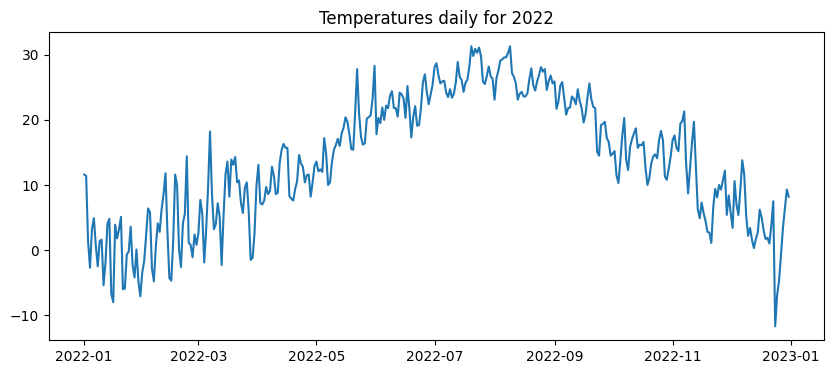

In [18]:
# Plot the time series
plt.figure(figsize=(10,4)) # Create the figure
plt.title('Temperatures daily for 2022') # Set title
plt.plot(df_temp_grouped['avgTemp']) # Define the plot
plt.show()

### 5. Bike Trips per Day<a class="anchor" id="bike-per-day"></a>

In [20]:
# Calculate the daily number of bike rides using groupby
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [21]:
# Identify the last two values for our merge checks
df_group.tail(2)

date  bike_rides_daily
363 2022-12-30             62298
364 2022-12-31             31466

In [22]:
# Outer merge df_temp_grouped with df_group
df_merged = df_temp_grouped.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df_merged['_merge'].value_counts(dropna = False))
print("Shape of December 30th is", df[df['date'] == '2022-12-30'].shape) # Check 
print("Shape of December 31st is", df[df['date'] == '2022-12-31'].shape) # Second check 

df_merged = df_merged.set_index('date')

_merge
both          365
left_only       0
right_only      0
Name: count, dtype: int64
Shape of December 30th is (62298, 15)
Shape of December 31st is (31466, 15)


### 6. Dual Axis Line Chart - Daily Bike Trips + Average Temperatures<a class="anchor" id="dual-axis"></a>

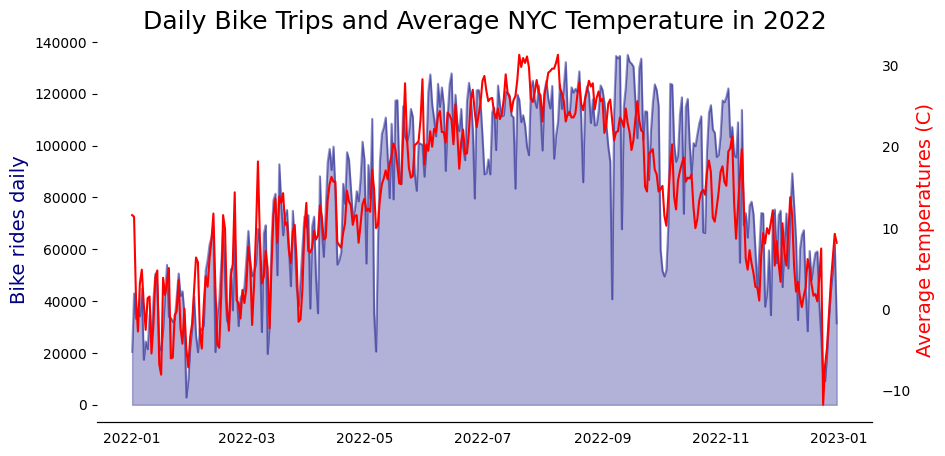

In [24]:
# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize=(10, 5))


# Make a plot of the bike rides (left y-axis)
ax.plot(df_merged['bike_rides_daily'],
        color='navy', 
        alpha=0.4)
ax.fill_between(df_merged.index, # Fill in the area underneath the plot
                df_merged['bike_rides_daily'], 
                color='navy', 
                alpha=0.3)
#ax.set_xlabel('Date in 2022', fontsize=14) # x-axis label may be extraneous
ax.set_ylabel('Bike rides daily', # y-axis label
              color='navy', 
              fontsize=14) 
ax.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax.xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax.yaxis.set_ticks_position('none')


# Initialize a twin object for two different y-axes on the sample plot
ax2 = ax.twinx()


# Make a plot with the average temperatures (right y-axis)
ax2.plot(df_merged['avgTemp'], 
         color='red')
ax2.set_ylabel('Average temperatures (C)', # y-axis label
               color = "red", 
               fontsize=14)
ax2.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax2.yaxis.set_ticks_position('none') # Eliminate axis tick marks

plt.title('Daily Bike Trips and Average NYC Temperature in 2022', fontsize=18)
plt.show()

#### PROCESS
    I took an OBJECT ORIENTED approach for this visualization because I wanted to first define the axes as objects that I could customize individually. First, I defined the container and the axes. From there, I built two plots: 1) visualized the number of daily bike trips (navy), and 2) visualizaed the average temperature (red). Because I defined the axes before, I could assign the property of dual axis on the axes. This allowed both plots to overlay with appropriately scaled y-axes.
    
    Other design choices were to fill in underneath the line for daily bike trips. This helped to visually differentiate the two plots (because they were very similar). The spines of the figure were also removed to improve the cleanliness of the design.

### 7. Histogram - Bike Trip Duration<a class="anchor" id="histogram"></a>

In [27]:
%%capture

# Make sure both the start and end time variables are datetime
df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)

In [28]:
%%capture

# Create a new column that calculates trip duration in seconds
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.seconds

In [29]:
# Check the output
df.head()

ride_id  rideable_type              started_at  \
0  9D0DC440CB40CF8E  electric_bike 2022-08-27 13:56:47.728   
1  2214991DFBE5C4D7  electric_bike 2022-08-20 10:37:02.756   
2  20C5D469563B6337   classic_bike 2022-08-31 18:55:03.051   
3  3E8791885BC189D1   classic_bike 2022-08-02 08:05:00.250   
4  8DBCBF98885106CB  electric_bike 2022-08-25 15:44:48.386   

                 ended_at        start_station_name start_station_id  \
0 2022-08-27 14:02:56.651  Flatbush Ave & Ocean Ave          3704.04   
1 2022-08-20 10:45:56.631    Forsyth St\t& Grand St          5382.07   
2 2022-08-31 19:03:37.344    Perry St & Bleecker St          5922.07   
3 2022-08-02 08:16:52.063       FDR Drive & E 35 St          6230.04   
4 2022-08-25 15:55:39.691           E 40 St & 5 Ave          6474.11   

                    end_station_name end_station_id  start_lat  start_lng  \
0          3 St & Prospect Park West        3865.05  40.663657 -73.963014   
1                    E 11 St & 1 Ave        5746.14  40.717798 -73.993161   
2               Grand St & Greene St        5500.02  40.735354 -74.004831   
3  Grand Army Plaza & Central Park S        6839.10  40.744219 -73.971212   
4                    Ave A & E 14 St        5779.11  40.752052 -73.982115   

     end_lat    end_lng member_casual       date  avgTemp  trip_duration  
0  40.668132 -73.973638        casual 2022-08-27     27.8            368  
1  40.729538 -73.984267        casual 2022-08-20     27.9            533  
2  40.721700 -74.002381        member 2022-08-31     25.6            514  
3  40.764397 -73.973715        member 2022-08-02     26.4            711  
4  40.730311 -73.980472        member 2022-08-25     28.1            651

In [30]:
# Subset the data to reduce memory load
df_duration = df[['ride_id', 'trip_duration', 'member_casual']]

In [31]:
# Check the highest and lowest values in the data
df_duration.sort_values(by='trip_duration', ascending=False)

ride_id  trip_duration member_casual
7951139   12B8BF4BD25AD717          86399        casual
16084961  059BCE0719BA8CD2          86397        member
16092935  DEF7CA86E5F06C4D          86396        member
16097617  139B374357EAFEAE          86396        member
16081761  F47A515ADEA1BBDC          86396        member
...                    ...            ...           ...
7979797   EBFA242C51457536              8        casual
10340214  94FDFC0FFF31311C              8        casual
11348259  A38EE672DCF218C9              5        member
3295259   37B6A8256BE52DD3              3        casual
16088531  B264C502D266348F              0        casual

[29838166 rows x 3 columns]

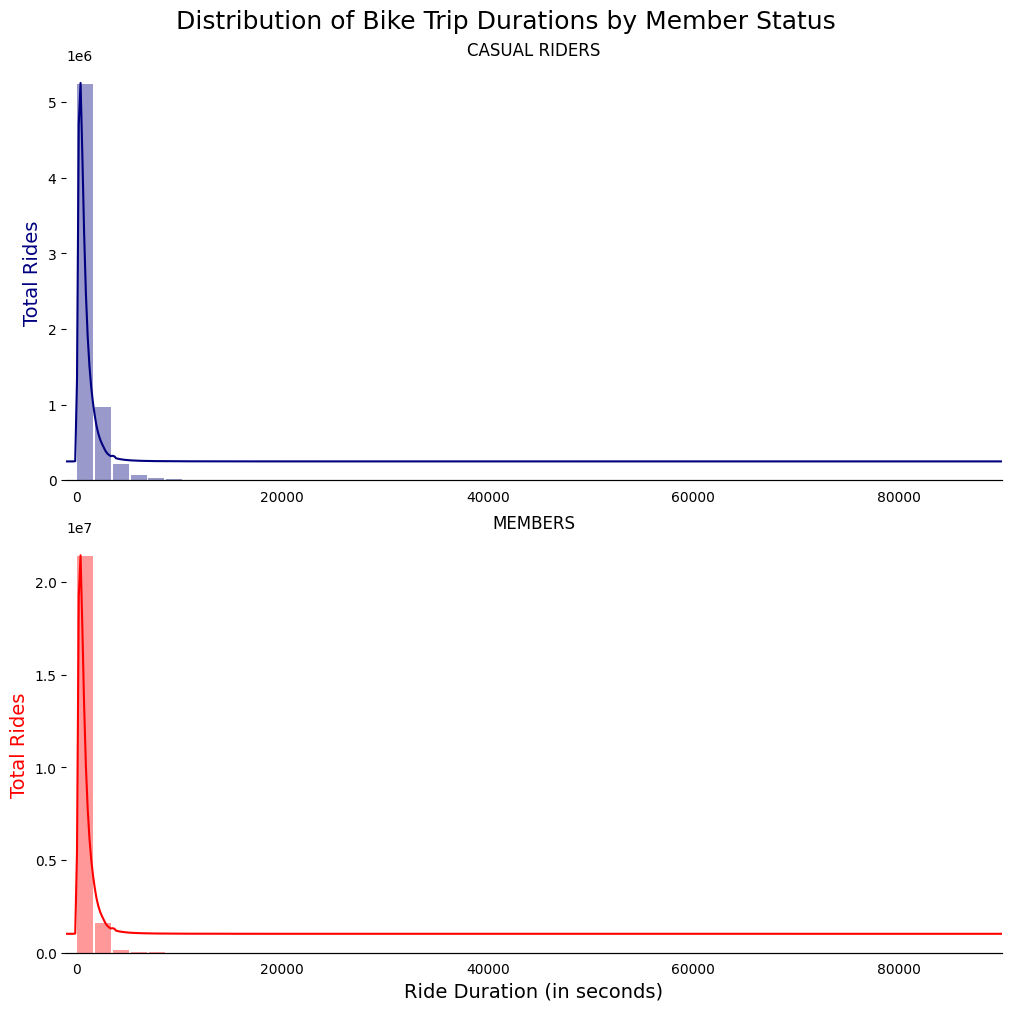

In [32]:
# Create figure and axes objects with subplots() that stack on top of each other
fig, (ax1, ax2) = plt.subplots(2, # Number of plots in figure
                               figsize=(10, 10), 
                               constrained_layout=True) # Make sure there's sufficient spacing between plots


# Make a plot of trip duration frequency for casual riders
ax1 = df_duration['trip_duration'].loc[df.member_casual=='casual'].plot(kind='hist', 
                                                                        bins=50, 
                                                                        color='navy', 
                                                                        alpha=0.4,
                                                                        rwidth=0.9, # Create a little space between bins
                                                                        ax=ax1)
ax3 = ax1.twinx() # Initialize a twin object for the top plot to show kde plot in addition to histogram
df_duration['trip_duration'].plot.kde(ax=ax3, # Create a kde plot using the twin axis (ax3) to ax1
                                      color='navy')
ax1.set_xlim([-1000, 90000]) # Manually set x-axis limits
ax1.set_ylabel('Total Rides', # y-axis label
               color='navy', 
               fontsize=14)
ax3.axes.get_yaxis().set_visible(False) # Hide the y-axis for kde plot (density)
ax1.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax3.spines[['right', 'left', 'top']].set_visible(False)
ax1.xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax3.xaxis.set_ticks_position('none')
ax1.set_title('CASUAL RIDERS') # Set title for first plot


# Make a second plot of trip duration frequency for members
ax2 = df_duration['trip_duration'].loc[df.member_casual=='member'].plot(kind='hist', 
                                                                        bins=50, 
                                                                        color='red', 
                                                                        alpha=0.4, 
                                                                        rwidth=0.9, # Create a little space between bins
                                                                        ax=ax2)
ax4 = ax2.twinx() # Initialize a twin object for the top plot to show kde plot in addition to histogram
df_duration['trip_duration'].plot.kde(ax=ax4, # Create a kde plot using the twin axis (ax4) to ax2
                                      color='red')
ax2.set_xlim([-1000, 90000]) # Manually set x-axis limits
ax2.set_yticks(np.arange(0, 25000000, 5000000)) # Manually set y-axis scale 
ax2.set_xlabel('Ride Duration (in seconds)', # x-axis label (being used for both plots)
               fontsize=14)
ax2.set_ylabel('Total Rides', # y-axis label
               color='red', 
               fontsize=14)
ax4.axes.get_yaxis().set_visible(False) # Hide the y-axis for kde plot (density)
ax2.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax4.spines[['right', 'left', 'top']].set_visible(False)
ax2.xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax4.xaxis.set_ticks_position('none')
ax2.set_title('MEMBERS') # Set title for second plot

plt.suptitle('Distribution of Bike Trip Durations by Member Status', # Set overall title for figure
             fontsize = 18)
plt.show()

### 8. Double Chart - Number of Rides by Ride Type and by Member Status<a class="anchor" id="double-chart"></a>

While the Chicago Divvy Bike data has two variables for 'usertype' and 'gender', the New York data does not have either of these two variables. Instead, the binary variables 'rideable_type' and 'member_casual' will be used.

In [35]:
# Subset the data to reduce memory load
df_doublechart = df[['ride_id', 'rideable_type', 'member_casual']]

In [36]:
# Group the data by 'rideable_type'
df_rideable = df_doublechart.groupby(['rideable_type']).count().reset_index()

In [37]:
# Group the data by 'member_casual'
df_membership = df_doublechart.groupby(['member_casual']).count().reset_index()

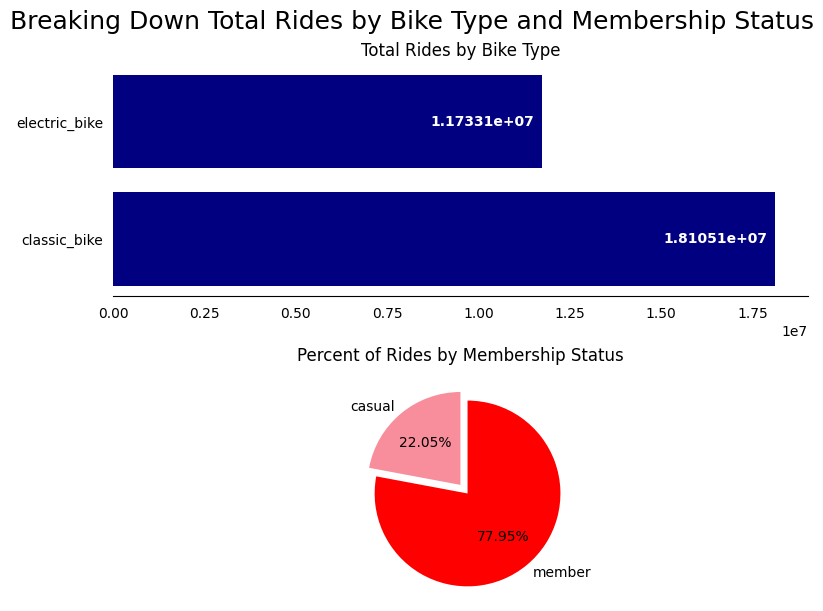

In [38]:
# Create figure and axis objects with subplots() that stack on top of each other
fig, ax = plt.subplots(2, # Number of plots in figure
                       figsize=(8, 6), 
                       constrained_layout=True) # Make sure there's sufficient spacing between plots


# Set the variables to be used in plots
ridetype = df_rideable['rideable_type']
ridetype_cnt = df_rideable['ride_id']
membership = df_membership['member_casual']
membership_cnt = df_membership['ride_id']


# Make a plot of the bike rides by bike type
ax[0].barh(ridetype, 
           ridetype_cnt, 
           color='navy')
ax[0].spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax[0].xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax[0].yaxis.set_ticks_position('none') 
ax[0].set_title('Total Rides by Bike Type') # Set title for first plot

# Add labels to bar chart
for i in ax[0].containers:
    ax[0].bar_label(i, fontsize = 10, fontweight=600, padding = -80, color = 'white')

    
# Make a plot of the bike rides by membership status
ax[1].pie(membership_cnt, 
          labels=membership, 
          startangle=90, # Change where the pie chart starts
          colors=['#F88D9C', 'red'], 
          autopct='%1.2f%%', # Show percentages
          textprops={'size': 'medium'}, # Text formatting
          explode=[0, 0.12]) # Add space between pie sections
ax[1].set_title('Percent of Rides by Membership Status') # Set title for second plot

plt.suptitle('Breaking Down Total Rides by Bike Type and Membership Status', # Set overall title for figure
             fontsize=18)
plt.show()